In [40]:
import pandas as pd

data = {
    'Hours_Studied': [1, 5, 8, 2, 7, 3, 10, 4],
    'Attendance_Percent': [45, 80, 90, 60, 95, 50, 100, 70],
    'Assignment_Completed': ['No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'Sleep_Hours': [4, 6, 7, 5, 8, 5, 7, 6],
    'Internet_Usage_Hours': [9,7,8,5,10,4,11,8],
    'Final_Result': ['Fail', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass']
}
df=pd.DataFrame(data)
print(df.head())

   Hours_Studied  Attendance_Percent Assignment_Completed  Sleep_Hours  \
0              1                  45                   No            4   
1              5                  80                  Yes            6   
2              8                  90                  Yes            7   
3              2                  60                   No            5   
4              7                  95                  Yes            8   

   Internet_Usage_Hours Final_Result  
0                     9         Fail  
1                     7         Pass  
2                     8         Pass  
3                     5         Fail  
4                    10         Pass  


##  Step 2: Data Preprocessing

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Assignment_Completed'] = le.fit_transform(df['Assignment_Completed'])  # No=0, Yes=1
df['Final_Result'] = le.fit_transform(df['Final_Result'])  # Fail=0, Pass=1

## Step 3: Define Features and Target

In [44]:
X = df[['Hours_Studied', 'Attendance_Percent', 'Assignment_Completed', 'Sleep_Hours','Internet_Usage_Hours']]
y = df['Final_Result']

print(X)
print(y)

   Hours_Studied  Attendance_Percent  Assignment_Completed  Sleep_Hours  \
0              1                  45                     0            4   
1              5                  80                     1            6   
2              8                  90                     1            7   
3              2                  60                     0            5   
4              7                  95                     1            8   
5              3                  50                     0            5   
6             10                 100                     1            7   
7              4                  70                     1            6   

   Internet_Usage_Hours  
0                     9  
1                     7  
2                     8  
3                     5  
4                    10  
5                     4  
6                    11  
7                     8  
0    0
1    1
2    1
3    0
4    1
5    0
6    1
7    1
Name: Final_Result, dtype: int32


## Step 4: Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Step 5: Train a Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Step 6: Make Predictions and Evaluate

In [50]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


#  Visualization: Decision Tree


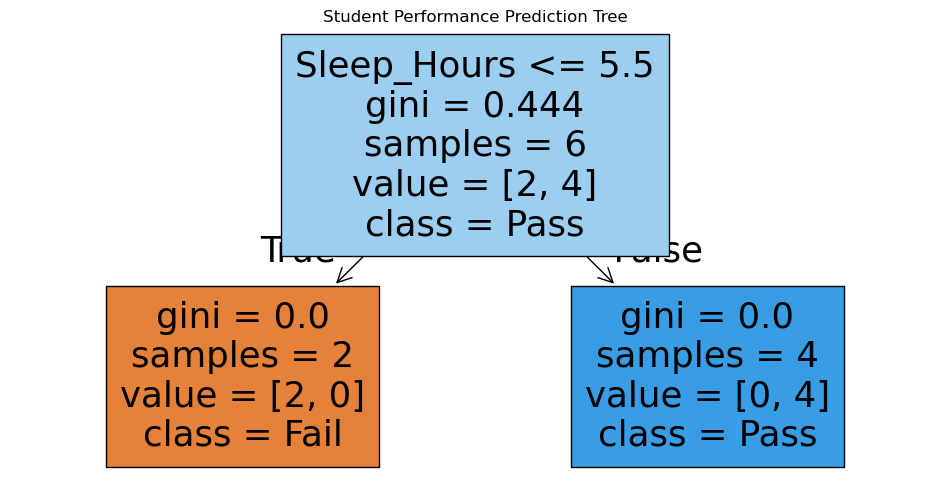

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plot_tree(model, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True)
plt.title("Student Performance Prediction Tree")
plt.show()

## model by logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
y_pred=model.predict(X_test)

print(y_pred)

[1 0]


In [56]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


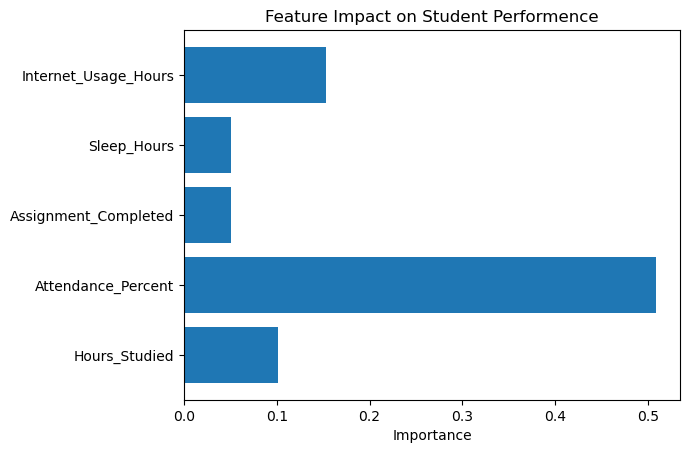

In [60]:
import matplotlib.pyplot as plt

coefficients = model.coef_[0]
features = X.columns

plt.barh(features, coefficients)
plt.xlabel("Importance")
plt.title("Feature Impact on Student Performence")
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset (Iris dataset as an example)
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
